#**Lifestyle Factors Affecting Sleep Quality**

In [22]:
import pandas as pd
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [23]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [24]:
df.shape

(374, 13)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [8]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [10]:
df.columns = df.columns.str.strip().str.replace(" ", "_")
df.columns

Index(['Person_ID', 'Gender', 'Age', 'Occupation', 'Sleep_Duration',
       'Quality_of_Sleep', 'Physical_Activity_Level', 'Stress_Level',
       'BMI_Category', 'Blood_Pressure', 'Heart_Rate', 'Daily_Steps',
       'Sleep_Disorder'],
      dtype='object')

In [11]:
df.isnull().sum()

,0
Person_ID,0
Gender,0
Age,0
Occupation,0
Sleep_Duration,0
Quality_of_Sleep,0
Physical_Activity_Level,0
Stress_Level,0
BMI_Category,0
Blood_Pressure,0


In [13]:
df["Sleep_Disorder"] = df["Sleep_Disorder"].fillna("None")
df.isnull().sum()

,0
Person_ID,0
Gender,0
Age,0
Occupation,0
Sleep_Duration,0
Quality_of_Sleep,0
Physical_Activity_Level,0
Stress_Level,0
BMI_Category,0
Blood_Pressure,0


###Question 1: Does sleep duration affect sleep quality?

In this analysis, we examine the relationship between the number of hours a person sleeps and their reported sleep quality.


In [14]:
df[["Sleep_Duration", "Quality_of_Sleep"]].corr()

,Sleep_Duration,Quality_of_Sleep
Sleep_Duration,1.000000,0.883213
Quality_of_Sleep,0.883213,1.000000


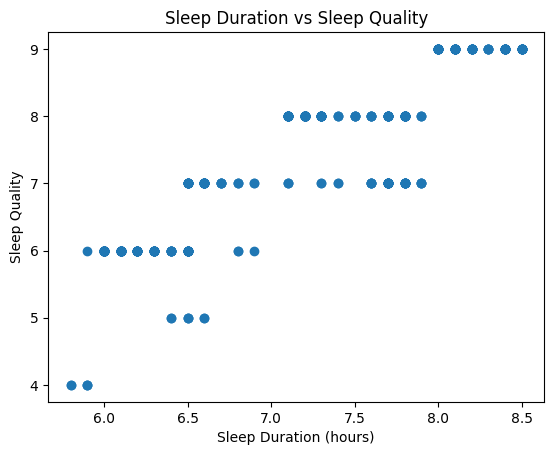

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df["Sleep_Duration"], df["Quality_of_Sleep"])
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Sleep Quality")
plt.title("Sleep Duration vs Sleep Quality")
plt.show()


### Observation: Sleep Duration vs Sleep Quality

From the scatter plot and correlation, we observe a positive relationship between sleep duration and sleep quality. Individuals who sleep longer tend to report better sleep quality.



### Question 2: How does stress level impact sleep duration?

Stress is often linked to lifestyle factors such as screen exposure and social media usage. This analysis explores whether higher stress levels are associated with reduced sleep duration.


In [16]:
df[["Stress_Level", "Sleep_Duration"]].corr()

,Stress_Level,Sleep_Duration
Stress_Level,1.000000,-0.811023
Sleep_Duration,-0.811023,1.000000


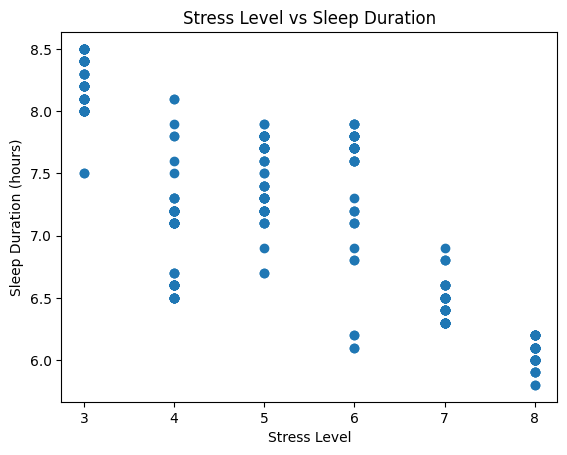

In [17]:
plt.figure()
plt.scatter(df["Stress_Level"], df["Sleep_Duration"])
plt.xlabel("Stress Level")
plt.ylabel("Sleep Duration (hours)")
plt.title("Stress Level vs Sleep Duration")
plt.show()

### Observation: Stress Level vs Sleep Duration

The scatter plot shows a negative relationship: higher stress levels are associated with lower sleep duration. This indicates that stress may reduce the amount of sleep a person gets.


### Question: Does physical activity affect sleep duration?

We analyze whether individuals who are more physically active tend to sleep longer. This helps understand the relationship between lifestyle and sleep.


In [18]:
df[["Physical_Activity_Level", "Sleep_Duration"]].corr()

,Physical_Activity_Level,Sleep_Duration
Physical_Activity_Level,1.00000,0.21236
Sleep_Duration,0.21236,1.00000


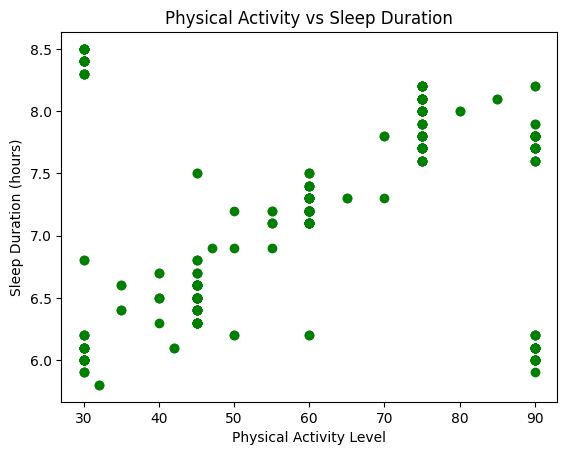

In [19]:
plt.figure()
plt.scatter(df["Physical_Activity_Level"], df["Sleep_Duration"], color='green')
plt.xlabel("Physical Activity Level")
plt.ylabel("Sleep Duration (hours)")
plt.title("Physical Activity vs Sleep Duration")
plt.show()

### Observation: Physical Activity vs Sleep Duration

From the scatter plot and correlation, we observe that individuals with higher physical activity levels tend to have slightly longer sleep duration. This suggests that an active lifestyle may positively influence sleep patterns.


### Question: Does BMI category affect sleep quality?

We explore whether a person's BMI category (underweight, normal, overweight, obese) is associated with their sleep quality. This helps understand the link between body health and sleep patterns.


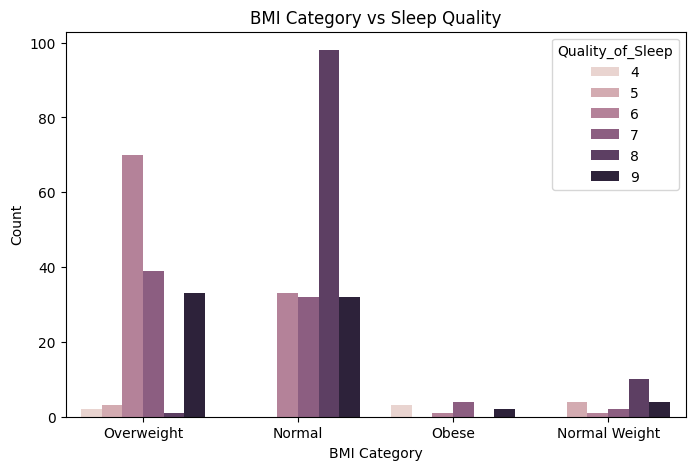

In [20]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x="BMI_Category", hue="Quality_of_Sleep", data=df)
plt.title("BMI Category vs Sleep Quality")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()


### Observation: BMI Category vs Sleep Quality

The plot shows that individuals in certain BMI categories tend to report poorer sleep quality more frequently. This indicates that body health may influence sleep patterns.


### Question: How do sleep disorders affect sleep duration?

We investigate whether individuals with reported sleep disorders have shorter sleep duration compared to those without disorders.


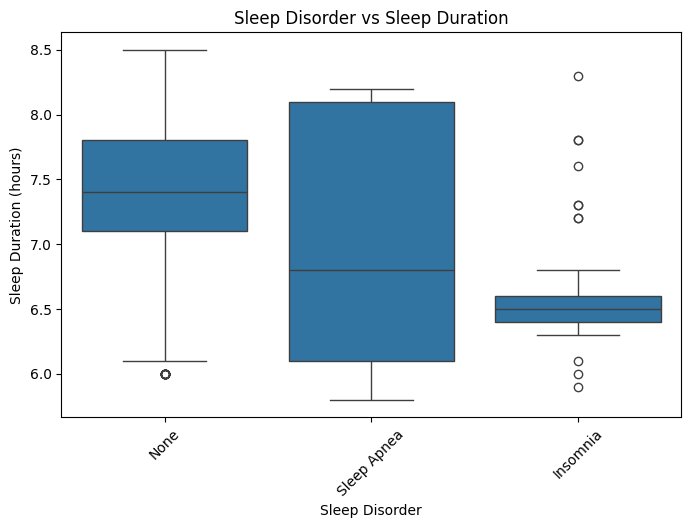

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Sleep_Disorder", y="Sleep_Duration", data=df)
plt.title("Sleep Disorder vs Sleep Duration")
plt.xlabel("Sleep Disorder")
plt.ylabel("Sleep Duration (hours)")
plt.xticks(rotation=45)
plt.show()


### Observation: Sleep Disorder vs Sleep Duration

The boxplot shows that individuals with sleep disorders generally sleep fewer hours compared to those without disorders. This confirms that sleep disorders negatively impact sleep duration.


#**FINAL INSIGHTS**

1. **Sleep Duration vs Sleep Quality:** Longer sleep correlates with better sleep quality.
2. **Stress Level vs Sleep Duration:** Higher stress levels are associated with shorter sleep duration.
3. **Physical Activity vs Sleep Duration:** Individuals with higher physical activity tend to sleep slightly longer.
4. **BMI Category vs Sleep Quality:** Certain BMI categories are more likely to report poor sleep.
5. **Sleep Disorder vs Sleep Duration:** People with sleep disorders sleep fewer hours on average.

**Overall:** Lifestyle factors such as stress, physical activity, BMI, and sleep disorders significantly affect sleep patterns. Promoting a healthy lifestyle can help improve sleep quality.

